# Problem Statement
Consider there's a client that specializes in traiding used cars across different states in US. As a Data Scientist, you are given a task of creating an automated system that predicts the selling price of cars based on various features (information) such as: car's model name, manufacture year, the current price when bought new, kilometers driven, fuels type and owners it had.

Tnhe price estimations from your system will be used to set a competitive selling price for the cars in used car market, also it will gain trust from customers, by providing detailed explanation for the predicted selling price outputted by your system.

You are given a CSV file containing accuracte historical data, which includes features and their actual selling prices. Your taks is to use this data to build a reliable system that can predict car prices of any other car you might want to sell that's not part of this set.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [3]:
df = pd.read_csv('/content/drive/MyDrive/DEBI/Data science /1- What is Data Science -1week &1 day/session 12/car_data.csv')


In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data = pd.get_dummies(df, columns=['Fuel_Type','Seller_Type','Transmission'])

In [5]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,False,False,True,True,False,False,True
1,sx4,2013,4.75,9.54,43000,0,False,True,False,True,False,False,True
2,ciaz,2017,7.25,9.85,6900,0,False,False,True,True,False,False,True
3,wagon r,2011,2.85,4.15,5200,0,False,False,True,True,False,False,True
4,swift,2014,4.60,6.87,42450,0,False,True,False,True,False,False,True


,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104,-0.017790,0.064315,-0.059959,0.039896,-0.039896,-0.000394,0.000394
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344,-0.025164,0.552339,-0.540571,0.550724,-0.550724,0.367128,-0.367128
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057,-0.011500,0.473306,-0.465244,0.512030,-0.512030,0.348715,-0.348715
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216,0.012223,0.172515,-0.172874,0.101419,-0.101419,0.162510,-0.162510
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000,-0.014272,-0.053469,0.055687,-0.124269,0.124269,0.050316,-0.050316
Fuel_Type_CNG,-0.017790,-0.025164,-0.011500,0.012223,-0.014272,1.000000,-0.040808,-0.160577,0.060300,-0.060300,-0.032018,0.032018
Fuel_Type_Diesel,0.064315,0.552339,0.473306,0.172515,-0.053469,-0.040808,1.000000,-0.979648,0.350467,-0.350467,0.098643,-0.098643
Fuel_Type_Petrol,-0.059959,-0.540571,-0.465244,-0.172874,0.055687,-0.160577,-0.979648,1.000000,-0.358321,0.358321,-0.091013,0.091013
Seller_Type_Dealer,0.039896,0.550724,0.512030,0.101419,-0.124269,0.060300,0.350467,-0.358321,1.000000,-1.000000,0.063240,-0.063240
Seller_Type_Individual,-0.039896,-0.550724,-0.512030,-0.101419,0.124269,-0.060300,-0.350467,0.358321,-1.000000,1.000000,-0.063240,0.063240


In [ ]:
X = data.drop(['Car_Name','Selling_Price'], axis=1)
y = data['Selling_Price']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

MAE:  1.2228312116321436
MSE:  3.2671574449685146
RMSE :  1.8075279928588974
R2 score:  0.8658945888563632


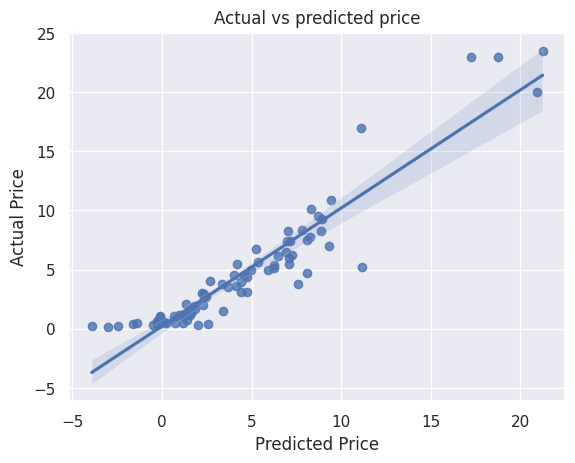

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE: ", (metrics.mean_absolute_error(pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(pred, y_test)))
print("RMSE : ", (np.sqrt(metrics.mean_squared_error(pred, y_test))))
print("R2 score: ", (metrics.r2_score(pred, y_test)))

sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("Actual vs predicted price")
plt.show()

-------------------------------------------


Use select features

In [ ]:
df.corr(numeric_only=True)


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


In [32]:
X = df[['Year','Present_Price']]
y = df['Selling_Price']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)


In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [37]:
import sklearn.metrics as metrics

MAE:  1.295743989283585
MSE:  3.570506544893918
RMSE :  1.8895784040081316
R2 score:  0.8353657808963257


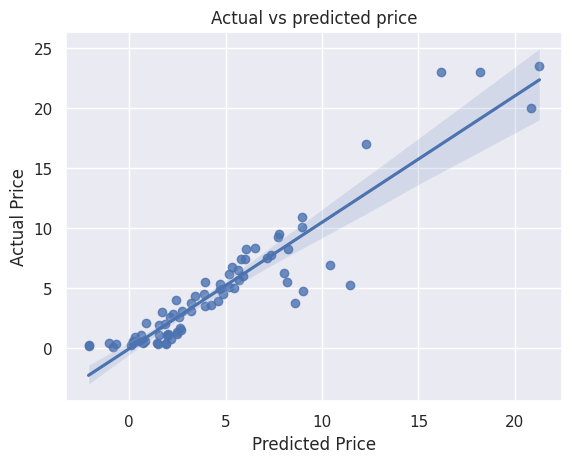

In [38]:
model = LinearRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)


print("MAE: ", (metrics.mean_absolute_error(pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(pred, y_test)))
print("RMSE : ", (np.sqrt(metrics.mean_squared_error(pred, y_test))))
print("R2 score: ", (metrics.r2_score(pred, y_test)))

sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("Actual vs predicted price")
plt.show()

Use model

In [ ]:
model.coef_

array([1.33314134, 4.49003959])

In [ ]:
model.intercept_

4.608577777777768

In [39]:

pred_test = df[['Year','Present_Price']]
pred_test= scaler.fit_transform(pred_test)
model.predict(pred_test)[0]

3.719802730599367

In [42]:
new_df ={'Year':'2019','Present_Price':6.2}
new_df = pd.DataFrame(new_df, index=[0])
new_df = scaler(new_df)
model.predict(new_df)[0]

4.608577777777768